In [6]:
import gc
import sys
import logging
from itertools import combinations
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns=100

In [7]:
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

In [8]:
!mkdir logs

mkdir: logs: File exists


In [9]:
def get_logger(LOGGER_PATH):
    # logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%H:%M:%S')
    logger = logging.getLogger('logger')
    hdlr = logging.FileHandler(LOGGER_PATH)
    formatter = logging.Formatter('%(filename)s[LINE:%(lineno)d]# ' + \
                                  '%(levelname)-8s [%(asctime)s]  %(message)s')
    hdlr.setFormatter(formatter)
    logger.addHandler(hdlr)
    ch = logging.StreamHandler(sys.stdout)
    ch.setLevel(logging.DEBUG) 
    formatter = logging.Formatter('%(asctime)s - [LINE:%(lineno)d]# - %(message)s')
    ch.setFormatter(formatter)
    logger.addHandler(ch)
    logger.setLevel(logging.INFO)
    return logger

logger = get_logger('./logs/logs.log')

In [10]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
songs_df = pd.read_csv('../data/songs.csv')
members_df = pd.read_csv('../data/members.csv', parse_dates=['registration_init_time', 'expiration_date'])
# songs_extra_df = pd.read_csv('./song_extra_info.csv')

In [11]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [12]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [13]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [14]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [15]:
train_length = len(train_df)

In [16]:
df = pd.concat((train_df, test_df), axis=0)
df = pd.merge(df, members_df, on='msno', how='left')
df = pd.merge(df, songs_df, on='song_id', how='left')

In [17]:
df.columns

Index(['id', 'msno', 'song_id', 'source_screen_name', 'source_system_tab',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language'],
      dtype='object')

In [18]:
df.head()

,id,msno,song_id,source_screen_name,source_system_tab,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,NaN,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,Explore,explore,online-playlist,1.0,1,0,NaN,7,2012-01-02,2017-10-05,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,NaN,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,Local playlist more,my library,local-playlist,1.0,13,24,female,9,2011-05-25,2017-09-11,284584.0,1259,Various Artists,NaN,NaN,52.0
2,NaN,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,Local playlist more,my library,local-playlist,1.0,13,24,female,9,2011-05-25,2017-09-11,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,NaN,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,Local playlist more,my library,local-playlist,1.0,13,24,female,9,2011-05-25,2017-09-11,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,NaN,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,Explore,explore,online-playlist,1.0,1,0,NaN,7,2012-01-02,2017-10-05,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


In [19]:
dates_cols = ['registration_init_time', 'expiration_date']
float_cols = ['bd', 'city', 'language', 'registered_via',]
cols_cat = ['artist_name', 'composer', 'lyricist', 'genre_ids',
           'msno', 'song_id', 'source_system_tab', 'source_screen_name',
           'source_type', 'gender',]

In [20]:
df[cols_cat] = df[cols_cat].fillna('NaN').astype(str)
df[float_cols] = df[float_cols].fillna(np.nan).astype(np.float32)

In [21]:
cols_cat = ['artist_name', 'composer', 'lyricist', 'genre_ids',
           'msno', 'song_id', 'source_system_tab', 'source_screen_name',
           'source_type', 'gender', 'bd', 'city', 'language', 'registered_via',]

In [22]:
le = {}
for col in cols_cat:
    logger.info(col)
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

2017-11-11 19:26:33,052 - [LINE:3]# - artist_name
2017-11-11 19:27:04,830 - [LINE:3]# - composer
2017-11-11 19:27:29,996 - [LINE:3]# - lyricist
2017-11-11 19:27:50,138 - [LINE:3]# - genre_ids
2017-11-11 19:28:09,775 - [LINE:3]# - msno
2017-11-11 19:28:47,349 - [LINE:3]# - song_id
2017-11-11 19:29:43,099 - [LINE:3]# - source_system_tab
2017-11-11 19:30:11,145 - [LINE:3]# - source_screen_name
2017-11-11 19:30:39,153 - [LINE:3]# - source_type
2017-11-11 19:31:05,433 - [LINE:3]# - gender
2017-11-11 19:31:23,748 - [LINE:3]# - bd
2017-11-11 19:31:25,423 - [LINE:3]# - city
2017-11-11 19:31:26,838 - [LINE:3]# - language
2017-11-11 19:31:28,099 - [LINE:3]# - registered_via


In [23]:
order = {}
for i in cols_cat:
    order[i] = 10 ** (np.trunc(np.log10(np.max(df[i].values)))+1)
logger.info(str(order))

2017-11-11 19:31:32,457 - [LINE:4]# - {'msno': 100000.0, 'source_system_tab': 10.0, 'composer': 100000.0, 'source_screen_name': 100.0, 'bd': 100.0, 'lyricist': 100000.0, 'source_type': 100.0, 'gender': 10.0, 'language': 1000.0, 'city': 100.0, 'song_id': 1000000.0, 'registered_via': 10.0, 'genre_ids': 1000.0, 'artist_name': 100000.0}


In [ ]:
df['diff'] = (df['expiration_date'] - df['registration_init_time']).dt.days

In [29]:
df.head()

,id,msno,song_id,source_screen_name,source_system_tab,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,NaN,9176,86884,7,2,7,1.0,0,2,0,2,2012-01-02,2017-10-05,206471.0,307,3784,16653,17945,8
1,NaN,19273,260594,8,4,5,1.0,11,21,1,3,2011-05-25,2017-09-11,284584.0,97,36868,51700,17945,8
2,NaN,19273,140755,8,4,5,1.0,11,21,1,3,2011-05-25,2017-09-11,225396.0,97,24602,51540,17945,8
3,NaN,19273,27577,8,4,5,1.0,11,21,1,3,2011-05-25,2017-09-11,255512.0,6,31652,41991,17945,0
4,NaN,9176,38706,7,2,7,1.0,0,2,0,2,2012-01-02,2017-10-05,187802.0,2,5190,9701,17945,8


### clstr

In [30]:
df['expiration_date_sorted'] = df['expiration_date'].rank()

In [31]:
df['time_to_end_of_test'] = df['expiration_date_sorted'].max() - df['expiration_date_sorted']

____

In [32]:
train_df = df[:train_length]
test_df = df[train_length:]

In [33]:
# откуда прослушивается песня
train_df['song_listened_from'] = train_df['song_id'] * order['source_type'] + train_df['source_type']
test_df['song_listened_from'] = test_df['song_id'] * order['source_type'] + test_df['source_type']

order['song_listened_from'] = 10 ** (np.trunc(np.log10(np.max(train_df['song_listened_from'].values)))+1)

cols_cat = cols_cat + ['song_listened_from']

______

In [34]:
PRE, VAL = int(len(train_df) * 0.5), int(len(train_df) * 0.75)

### Local validation

In [35]:
loc_before_train = train_df[: PRE].copy()
loc_train        = train_df[PRE: VAL].copy()
loc_before_test  = train_df[: VAL].copy()
loc_test         = train_df[VAL: ].copy()

### Submit

> размер трейна такой же как и размер теста из-за девил фичи от васи. (распределение удаленности - дб одинаковым)

In [ ]:
(df[:train_length].shape[0] - df[train_length:].shape[0]) / df[:train_length].shape[0]

### Feature generation

In [36]:
### del useless data
del train_df, test_df
gc.collect()

7

In [43]:
X_tr = pd.DataFrame(index=loc_train.index)
X_ts = pd.DataFrame(index=loc_test.index)

In [44]:
X_tr['from_pre'] = np.arange(0, len(loc_train))
X_ts['from_pre'] = np.arange(0, len(loc_test))

In [48]:
X_tr.tail()

,from_pre
5533058,1844349
5533059,1844350
5533060,1844351
5533061,1844352
5533062,1844353


In [61]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

In [62]:
def simple_svd(df, loc_before, loc, num_comp=30):
    
    table = loc_before[loc_before.target == 1]
    
    n_users = df.msno.max() + 1
    n_items = df.song_id.max() + 1
    
    A = csc_matrix(
        (np.ones(len(table)), (table.msno, table.song_id)),
        shape=(n_users, n_items)
    )
    
    u, eig, vt = svds(A, k=num_comp) # get SVD components from train matrix.
    u = np.dot(u, np.diag(eig))
    preds = []
    vt = vt.T
    
    for i,j in loc[['msno','song_id']].values:
        preds.append(u[i].dot(vt[j]))
        
    return preds

In [63]:
preds = simple_svd(df[['msno','song_id']], loc_before_train.copy(), loc_train.copy())
X_tr['svd'] = preds

preds = simple_svd(df[['msno','song_id']], loc_before_test.copy(), loc_test.copy())
X_ts['svd'] = preds

In [64]:
assert loc_train.shape[0] == X_tr.shape[0]

In [65]:
X_tr.head()

,from_pre,svd
3688709,0,0.016414
3688710,1,0.001559
3688711,2,-0.000934
3688712,3,0.002035
3688713,4,0.013792


In [66]:
del df
gc.collect()

1857

In [67]:
def get_mean_for_target_in_group(history, current, groups=list(), target='target'):
    assert isinstance(groups, list) and len(groups) > 0
    suff = 'target_mean_in_groups_'+'|'.join(groups)
    train = history[groups[0]].copy()
    curr = current[groups[0]].copy()
    for col in groups[1:]:
        train = train * order[col] + history[col]
        curr = curr * order[col] + current[col]
    mapping = history.groupby(train)[target].mean()
    return curr.map(mapping).fillna(mapping.mean())

In [68]:
target = 'target'
for feature in cols_cat:
    suff = 'target_mean_in_groups_'+feature
    logger.info(suff)
    X_tr[suff] = get_mean_for_target_in_group(loc_before_train, loc_train, 
                                                   groups=[feature], target = 'target')
    X_ts[suff] = get_mean_for_target_in_group(loc_before_test, loc_test, 
                                                   groups=[feature], target = 'target')

2017-11-11 20:02:36,004 - [LINE:4]# - target_mean_in_groups_artist_name
2017-11-11 20:02:37,536 - [LINE:4]# - target_mean_in_groups_composer
2017-11-11 20:02:38,799 - [LINE:4]# - target_mean_in_groups_lyricist
2017-11-11 20:02:39,804 - [LINE:4]# - target_mean_in_groups_genre_ids
2017-11-11 20:02:40,618 - [LINE:4]# - target_mean_in_groups_msno
2017-11-11 20:02:41,649 - [LINE:4]# - target_mean_in_groups_song_id
2017-11-11 20:02:43,419 - [LINE:4]# - target_mean_in_groups_source_system_tab
2017-11-11 20:02:44,186 - [LINE:4]# - target_mean_in_groups_source_screen_name
2017-11-11 20:02:44,917 - [LINE:4]# - target_mean_in_groups_source_type
2017-11-11 20:02:45,792 - [LINE:4]# - target_mean_in_groups_gender
2017-11-11 20:02:46,622 - [LINE:4]# - target_mean_in_groups_bd
2017-11-11 20:02:47,379 - [LINE:4]# - target_mean_in_groups_city
2017-11-11 20:02:48,206 - [LINE:4]# - target_mean_in_groups_language
2017-11-11 20:02:49,019 - [LINE:4]# - target_mean_in_groups_registered_via
2017-11-11 20:02:49

In [69]:
target = 'target'
for groups in combinations(cols_cat, 2):
    suff = 'target_mean_in_groups_'+'|'.join(groups)
    logger.info(suff)
    groups = [i for i in groups]
    X_tr[suff] = get_mean_for_target_in_group(loc_before_train, loc_train, 
                                               groups=groups, target = 'target')
    X_ts[suff] = get_mean_for_target_in_group(loc_before_test, loc_test, 
                                               groups=groups, target = 'target')

2017-11-11 20:10:49,497 - [LINE:4]# - target_mean_in_groups_artist_name|composer
2017-11-11 20:10:52,795 - [LINE:4]# - target_mean_in_groups_artist_name|lyricist
2017-11-11 20:10:55,149 - [LINE:4]# - target_mean_in_groups_artist_name|genre_ids
2017-11-11 20:10:56,754 - [LINE:4]# - target_mean_in_groups_artist_name|msno
2017-11-11 20:11:10,804 - [LINE:4]# - target_mean_in_groups_artist_name|song_id
2017-11-11 20:11:13,400 - [LINE:4]# - target_mean_in_groups_artist_name|source_system_tab
2017-11-11 20:11:14,895 - [LINE:4]# - target_mean_in_groups_artist_name|source_screen_name
2017-11-11 20:11:17,341 - [LINE:4]# - target_mean_in_groups_artist_name|source_type
2017-11-11 20:11:20,034 - [LINE:4]# - target_mean_in_groups_artist_name|gender
2017-11-11 20:11:21,479 - [LINE:4]# - target_mean_in_groups_artist_name|bd
2017-11-11 20:11:24,047 - [LINE:4]# - target_mean_in_groups_artist_name|city
2017-11-11 20:11:26,340 - [LINE:4]# - target_mean_in_groups_artist_name|language
2017-11-11 20:11:27,84

2017-11-11 20:17:36,133 - [LINE:4]# - target_mean_in_groups_language|registered_via
2017-11-11 20:17:37,351 - [LINE:4]# - target_mean_in_groups_language|song_listened_from
2017-11-11 20:17:41,658 - [LINE:4]# - target_mean_in_groups_registered_via|song_listened_from


# от Васи! -> counts для всего датасета

In [37]:
def get_count_for_target_in_group(history, current, groups=list(), target='target'):
    assert isinstance(groups, list) and len(groups) > 0
    suff = 'count_for_'+target+'_in_groups_'+'|'.join(groups)
    train = history[groups[0]].copy()
    curr = current[groups[0]].copy()
    for col in groups[1:]:
        train = train * order[col] + history[col]
        curr = curr * order[col] + current[col]
    mapping = history.groupby(train)[target].count()
    return curr.map(mapping).fillna(mapping.mean())

In [38]:
for groups in [('genre_ids', 'msno'), ('song_id', 'msno'),
               ('source_screen_name', 'msno'),  ('artist_name', 'msno'), 
               ('source_type', 'msno'), ('song_id', 'source_type'),
               ('source_screen_name', 'artist_name'), ('language', 'msno'),
               ('registered_via', 'source_type'), ('registered_via', 'song_id'),
               ('artist_name', 'gender'),
              ]:
# for groups in combinations(cols_cat+['song_listened_from'], 2):
#     for target in cols_cat+['song_listened_from']: 
    for target in ['genre_ids', 'msno', 'song_listened_from',
                   'song_id', 'artist_name', 'source_type', 'gender',
                   'source_screen_name', 'bd', 'registered_via']: 
        groups = [i for i in groups]
        if target in groups:
            continue
        suff = 'count_for_'+target+'_in_groups_'+'|'.join(groups)
        logger.info(suff)
        X_tr[suff] = get_count_for_target_in_group(pd.concat((loc_before_train, loc_train), axis=0), loc_train, 
                                                   groups=groups, target=target)
        X_ts[suff] = get_count_for_target_in_group(pd.concat((loc_before_test, loc_test), axis=0), loc_test, 
                                                   groups=groups, target=target)

2017-11-04 21:04:00,284 - [LINE:17]# - count_for_song_listened_from_in_groups_genre_ids|msno
2017-11-04 21:04:07,398 - [LINE:17]# - count_for_song_id_in_groups_genre_ids|msno
2017-11-04 21:04:14,540 - [LINE:17]# - count_for_artist_name_in_groups_genre_ids|msno
2017-11-04 21:04:21,722 - [LINE:17]# - count_for_source_type_in_groups_genre_ids|msno
2017-11-04 21:04:28,860 - [LINE:17]# - count_for_gender_in_groups_genre_ids|msno
2017-11-04 21:04:36,132 - [LINE:17]# - count_for_source_screen_name_in_groups_genre_ids|msno
2017-11-04 21:04:43,712 - [LINE:17]# - count_for_bd_in_groups_genre_ids|msno
2017-11-04 21:04:51,576 - [LINE:17]# - count_for_registered_via_in_groups_genre_ids|msno
2017-11-04 21:04:59,363 - [LINE:17]# - count_for_genre_ids_in_groups_song_id|msno
2017-11-04 21:05:26,132 - [LINE:17]# - count_for_song_listened_from_in_groups_song_id|msno
2017-11-04 21:05:44,896 - [LINE:17]# - count_for_artist_name_in_groups_song_id|msno
2017-11-04 21:06:01,570 - [LINE:17]# - count_for_source_

#### TODO select by hands triplets !!!!!

In [39]:
def count_of_zeros(x):
    return (x == 0).sum()

def count_of_ones(x):
    return (x == 1).sum()

def evidense(x):
    return len(x)

def get_count(history, current, groups=list(), counter=count_of_ones):
    assert isinstance(groups, list) and len(groups) > 0
    train = history[groups[0]].copy()
    curr = current[groups[0]].copy()
    for col in groups[1:]:
        train = train * order[col] + history[col]
        curr = curr * order[col] + current[col]
    counter_mapping = history.groupby(train).target.apply(counter)
    return curr.map(counter_mapping).fillna(-1)

In [40]:
for feature in ['msno', 'song_id']:
    
    suff = 'count_of_1_for_'+feature
    logger.info(suff)
    X_tr[suff] = get_count(loc_before_train, loc_train, groups=[feature], counter=count_of_ones)
    X_ts[suff] = get_count(loc_before_test,  loc_test, groups=[feature], counter=count_of_ones)
    
    suff = 'count_of_0_for_'+feature
    logger.info(suff)
    X_tr[suff] = get_count(loc_before_train, loc_train, groups=[feature], counter=count_of_zeros)
    X_ts[suff] = get_count(loc_before_test,  loc_test, groups=[feature], counter=count_of_zeros)
    
    suff = 'evidense_for_'+feature
    logger.info(suff)
    X_tr[suff] = get_count(loc_before_train, loc_train, groups=[feature], counter=evidense)
    X_ts[suff] = get_count(loc_before_test,  loc_test, groups=[feature], counter=evidense)

2017-11-04 21:19:14,422 - [LINE:4]# - count_of_1_for_msno
2017-11-04 21:19:32,143 - [LINE:9]# - count_of_0_for_msno
2017-11-04 21:19:48,615 - [LINE:14]# - evidense_for_msno
2017-11-04 21:19:52,093 - [LINE:4]# - count_of_1_for_song_id
2017-11-04 21:22:52,844 - [LINE:9]# - count_of_0_for_song_id
2017-11-04 21:25:52,106 - [LINE:14]# - evidense_for_song_id


In [41]:
def weighted_exp_regression(x):
    x = list(x)
    x = np.array(x)
    if np.all(np.isnan(x)):
        return -2
    x = x[~np.isnan(x)]
    if (x == 0).sum() == len(x):
        return 0
    w = [np.exp(-i**0.25) for i in range(len(x), 0, -1)]
    w = np.array(w) / np.sum(w)
    return x.dot(w)

def weighted_sqrt_regression(x):
    x = list(x)
    x = np.array(x)
    if np.all(np.isnan(x)):
        return -2
    x = x[~np.isnan(x)]
    if (x == 0).sum() == len(x):
        return 0
    w = [np.sqrt(i+1) for i in range(0, len(x))]
    w = np.array(w) / np.sum(w)
    return x.dot(w)

def get_regression(history, current, groups=list(), regression=weighted_exp_regression):
    assert isinstance(groups, list) and len(groups) > 0
    train = history[groups[0]].copy()
    curr = current[groups[0]].copy()
    for col in groups[1:]:
        train = train * order[col] + history[col]
        curr = curr * order[col] + current[col]
    exp_regr_mapping = history.groupby(train).target.apply(regression)
    return curr.map(exp_regr_mapping).fillna(-99)

In [42]:
for feature in ['msno']:
    suff = 'regresssion_sqrt_for_'+feature
    X_tr[suff] = get_regression(loc_before_train, loc_train, groups=[feature],regression=weighted_sqrt_regression)
    X_ts[suff] = get_regression(loc_before_test, loc_test, groups=[feature],regression=weighted_sqrt_regression)

In [43]:
for feature in ['song_id']:
    suff = 'regresssion_exp_for_'+feature
    X_tr[suff] = get_regression(loc_before_train, loc_train, groups=[feature])
    X_ts[suff] = get_regression(loc_before_test, loc_test, groups=[feature])

In [44]:
for groups in [ ('msno', 'source_type'), 
                ('msno', 'source_type', 'genre_ids'),
                ('msno', 'source_type', 'language'),
              ]:
    groups = [i for i in groups]
    suff = 'regresssion_sqrt_for_'+'|'.join(groups)
    logger.info(suff)
    X_tr[suff] = get_regression(loc_before_train, loc_train, groups=groups,
                                regression=weighted_sqrt_regression)
    X_ts[suff] = get_regression(loc_before_test, loc_test, groups=groups, 
                                regression=weighted_sqrt_regression)

2017-11-04 21:28:12,029 - [LINE:4]# - regresssion_sqrt_for_msno|source_type
2017-11-04 21:29:02,220 - [LINE:4]# - regresssion_sqrt_for_msno|source_type|genre_ids


In [45]:
for groups in [ ('msno', 'source_screen_name'), 
                ('msno', 'artist_name'), ('msno', 'genre_ids'),
                ('msno', 'language'), ('msno', 'source_system_tab'), 
                ]:
    groups = [i for i in groups]
    
    suff = 'regresssion_exp_for_'+'|'.join(groups)
    logger.info(suff)
    X_tr[suff] = get_regression(loc_before_train, loc_train, groups=groups,
                                regression=weighted_exp_regression)
    X_ts[suff] = get_regression(loc_before_test, loc_test, groups=groups, 
                                regression=weighted_exp_regression)

2017-11-04 21:31:43,506 - [LINE:8]# - regresssion_exp_for_msno|source_screen_name
2017-11-04 21:32:38,398 - [LINE:8]# - regresssion_exp_for_msno|artist_name
2017-11-04 21:41:33,721 - [LINE:8]# - regresssion_exp_for_msno|genre_ids
2017-11-04 21:43:11,973 - [LINE:8]# - regresssion_exp_for_msno|language
2017-11-04 21:43:57,094 - [LINE:8]# - regresssion_exp_for_msno|source_system_tab


In [46]:
# 30m,
for feature in ['song_id']: 
    for feature2 in ['source_screen_name', 'source_system_tab']:
        groups = [feature, feature2]
        suff = 'regresssion_exp_for_'+'|'.join(groups)
        logger.info(suff)
        X_tr[suff] = get_regression(loc_before_train, loc_train, groups=groups)
        X_ts[suff] = get_regression(loc_before_test, loc_test, groups=groups)

2017-11-04 21:44:32,665 - [LINE:6]# - regresssion_exp_for_song_id|source_screen_name
2017-11-04 21:47:13,973 - [LINE:6]# - regresssion_exp_for_song_id|source_system_tab


In [47]:
gc.collect()

195

In [48]:
for i in ['expiration_date',
          'diff',
          'source_screen_name', 
          'source_type',
#           'expiration_date_sorted',
          'time_to_end_of_test',
          'registered_via',
          'bd', 
          'gender', 
          'genre_ids', 
          'source_system_tab']:
    X_tr[i] = loc_train[i].values.astype(np.float32)
    X_ts[i] = loc_test[i].values.astype(np.float32)

In [49]:
X_tr.head()

,svd,target_mean_in_groups_artist_name,target_mean_in_groups_composer,target_mean_in_groups_lyricist,target_mean_in_groups_genre_ids,target_mean_in_groups_msno,target_mean_in_groups_song_id,target_mean_in_groups_source_system_tab,target_mean_in_groups_source_screen_name,target_mean_in_groups_source_type,target_mean_in_groups_gender,target_mean_in_groups_bd,target_mean_in_groups_city,target_mean_in_groups_language,target_mean_in_groups_registered_via,target_mean_in_groups_song_listened_from,target_mean_in_groups_artist_name|composer,target_mean_in_groups_artist_name|lyricist,target_mean_in_groups_artist_name|genre_ids,target_mean_in_groups_artist_name|msno,target_mean_in_groups_artist_name|song_id,target_mean_in_groups_artist_name|source_system_tab,target_mean_in_groups_artist_name|source_screen_name,target_mean_in_groups_artist_name|source_type,target_mean_in_groups_artist_name|gender,target_mean_in_groups_artist_name|bd,target_mean_in_groups_artist_name|city,target_mean_in_groups_artist_name|language,target_mean_in_groups_artist_name|registered_via,target_mean_in_groups_artist_name|song_listened_from,target_mean_in_groups_composer|lyricist,target_mean_in_groups_composer|genre_ids,target_mean_in_groups_composer|msno,target_mean_in_groups_composer|song_id,target_mean_in_groups_composer|source_system_tab,target_mean_in_groups_composer|source_screen_name,target_mean_in_groups_composer|source_type,target_mean_in_groups_composer|gender,target_mean_in_groups_composer|bd,target_mean_in_groups_composer|city,target_mean_in_groups_composer|language,target_mean_in_groups_composer|registered_via,target_mean_in_groups_composer|song_listened_from,target_mean_in_groups_lyricist|genre_ids,target_mean_in_groups_lyricist|msno,target_mean_in_groups_lyricist|song_id,target_mean_in_groups_lyricist|source_system_tab,target_mean_in_groups_lyricist|source_screen_name,target_mean_in_groups_lyricist|source_type,target_mean_in_groups_lyricist|gender,...,count_for_msno_in_groups_registered_via|source_type,count_for_song_listened_from_in_groups_registered_via|source_type,count_for_song_id_in_groups_registered_via|source_type,count_for_artist_name_in_groups_registered_via|source_type,count_for_gender_in_groups_registered_via|source_type,count_for_source_screen_name_in_groups_registered_via|source_type,count_for_bd_in_groups_registered_via|source_type,count_for_genre_ids_in_groups_registered_via|song_id,count_for_msno_in_groups_registered_via|song_id,count_for_song_listened_from_in_groups_registered_via|song_id,count_for_artist_name_in_groups_registered_via|song_id,count_for_source_type_in_groups_registered_via|song_id,count_for_gender_in_groups_registered_via|song_id,count_for_source_screen_name_in_groups_registered_via|song_id,count_for_bd_in_groups_registered_via|song_id,count_for_genre_ids_in_groups_artist_name|gender,count_for_msno_in_groups_artist_name|gender,count_for_song_listened_from_in_groups_artist_name|gender,count_for_song_id_in_groups_artist_name|gender,count_for_source_type_in_groups_artist_name|gender,count_for_source_screen_name_in_groups_artist_name|gender,count_for_bd_in_groups_artist_name|gender,count_for_registered_via_in_groups_artist_name|gender,count_of_1_for_msno,count_of_0_for_msno,evidense_for_msno,count_of_1_for_song_id,count_of_0_for_song_id,evidense_for_song_id,regresssion_sqrt_for_msno,regresssion_exp_for_song_id,regresssion_sqrt_for_msno|source_type,regresssion_sqrt_for_msno|source_type|genre_ids,regresssion_exp_for_msno|source_screen_name,regresssion_exp_for_msno|artist_name,regresssion_exp_for_msno|genre_ids,regresssion_exp_for_msno|language,regresssion_exp_for_msno|source_system_tab,regresssion_exp_for_song_id|source_screen_name,regresssion_exp_for_song_id|source_system_tab,expiration_date,diff,source_screen_name,source_type,time_to_end_of_test,registered_via,bd,gender,genre_ids,source_system_tab
4869095,0.084359,0.561112,0.572000,0.562010,0.556320,0.446866,0.570064,0.667121,0.683052,0.702502,0.553621,0.587185,0.560572,0.

In [50]:
logger.info(str(X_tr.columns))

2017-11-04 21:49:31,262 - [LINE:1]# - Index(['svd', 'target_mean_in_groups_artist_name',
       'target_mean_in_groups_composer', 'target_mean_in_groups_lyricist',
       'target_mean_in_groups_genre_ids', 'target_mean_in_groups_msno',
       'target_mean_in_groups_song_id',
       'target_mean_in_groups_source_system_tab',
       'target_mean_in_groups_source_screen_name',
       'target_mean_in_groups_source_type',
       ...
       'expiration_date', 'diff', 'source_screen_name', 'source_type',
       'time_to_end_of_test', 'registered_via', 'bd', 'gender', 'genre_ids',
       'source_system_tab'],
      dtype='object', length=237)


In [51]:
del loc_before_test, loc_before_train
gc.collect()

235

__________

#### GBDT

In [70]:
y_train = loc_train.target.values
y_test = loc_test.target.values

del loc_train, loc_test
gc.collect()

105

In [73]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_tr.values, y_train, feature_name=list(X_tr.columns.values))
lgb_eval = lgb.Dataset(X_ts.values, y_test, reference=lgb_train)

OSError: dlopen(/Users/amir/ds_venv/lib/python3.5/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib
  Referenced from: /Users/amir/ds_venv/lib/python3.5/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth':8,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'num_leaves': 32,
    'learning_rate': 0.03,
    'feature_fraction_seed':4242,
    'bagging_seed':4242,
    'data_random_seed':4242,
}

evals_result = {}  # to record eval results for plotting
print('Start training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1500,
                verbose_eval=10,
#                 categorical_feature = ['source_screen_name', 'source_type', 'source_system_tab'],
#                 learning_rates=lambda iter: 0.3 * (0.99 ** iter),
                evals_result=evals_result,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)

Start training...
Training until validation scores don't improve for 50 rounds.
[10]	valid_0's auc: 0.686251
[20]	valid_0's auc: 0.689074
[30]	valid_0's auc: 0.693691
[40]	valid_0's auc: 0.69767
[50]	valid_0's auc: 0.700322
[60]	valid_0's auc: 0.702302
[70]	valid_0's auc: 0.704195
[80]	valid_0's auc: 0.705631
[90]	valid_0's auc: 0.70684
[100]	valid_0's auc: 0.708146
[110]	valid_0's auc: 0.709328
[120]	valid_0's auc: 0.710211
[130]	valid_0's auc: 0.711186
[140]	valid_0's auc: 0.711865
[150]	valid_0's auc: 0.712529
[160]	valid_0's auc: 0.713328
[170]	valid_0's auc: 0.713652
[180]	valid_0's auc: 0.714054
[190]	valid_0's auc: 0.714392
[200]	valid_0's auc: 0.714823
[210]	valid_0's auc: 0.715193
[220]	valid_0's auc: 0.715442
[230]	valid_0's auc: 0.71579
[240]	valid_0's auc: 0.71606
[250]	valid_0's auc: 0.716266
[260]	valid_0's auc: 0.716425
[270]	valid_0's auc: 0.71666
[280]	valid_0's auc: 0.716771
[290]	valid_0's auc: 0.716775


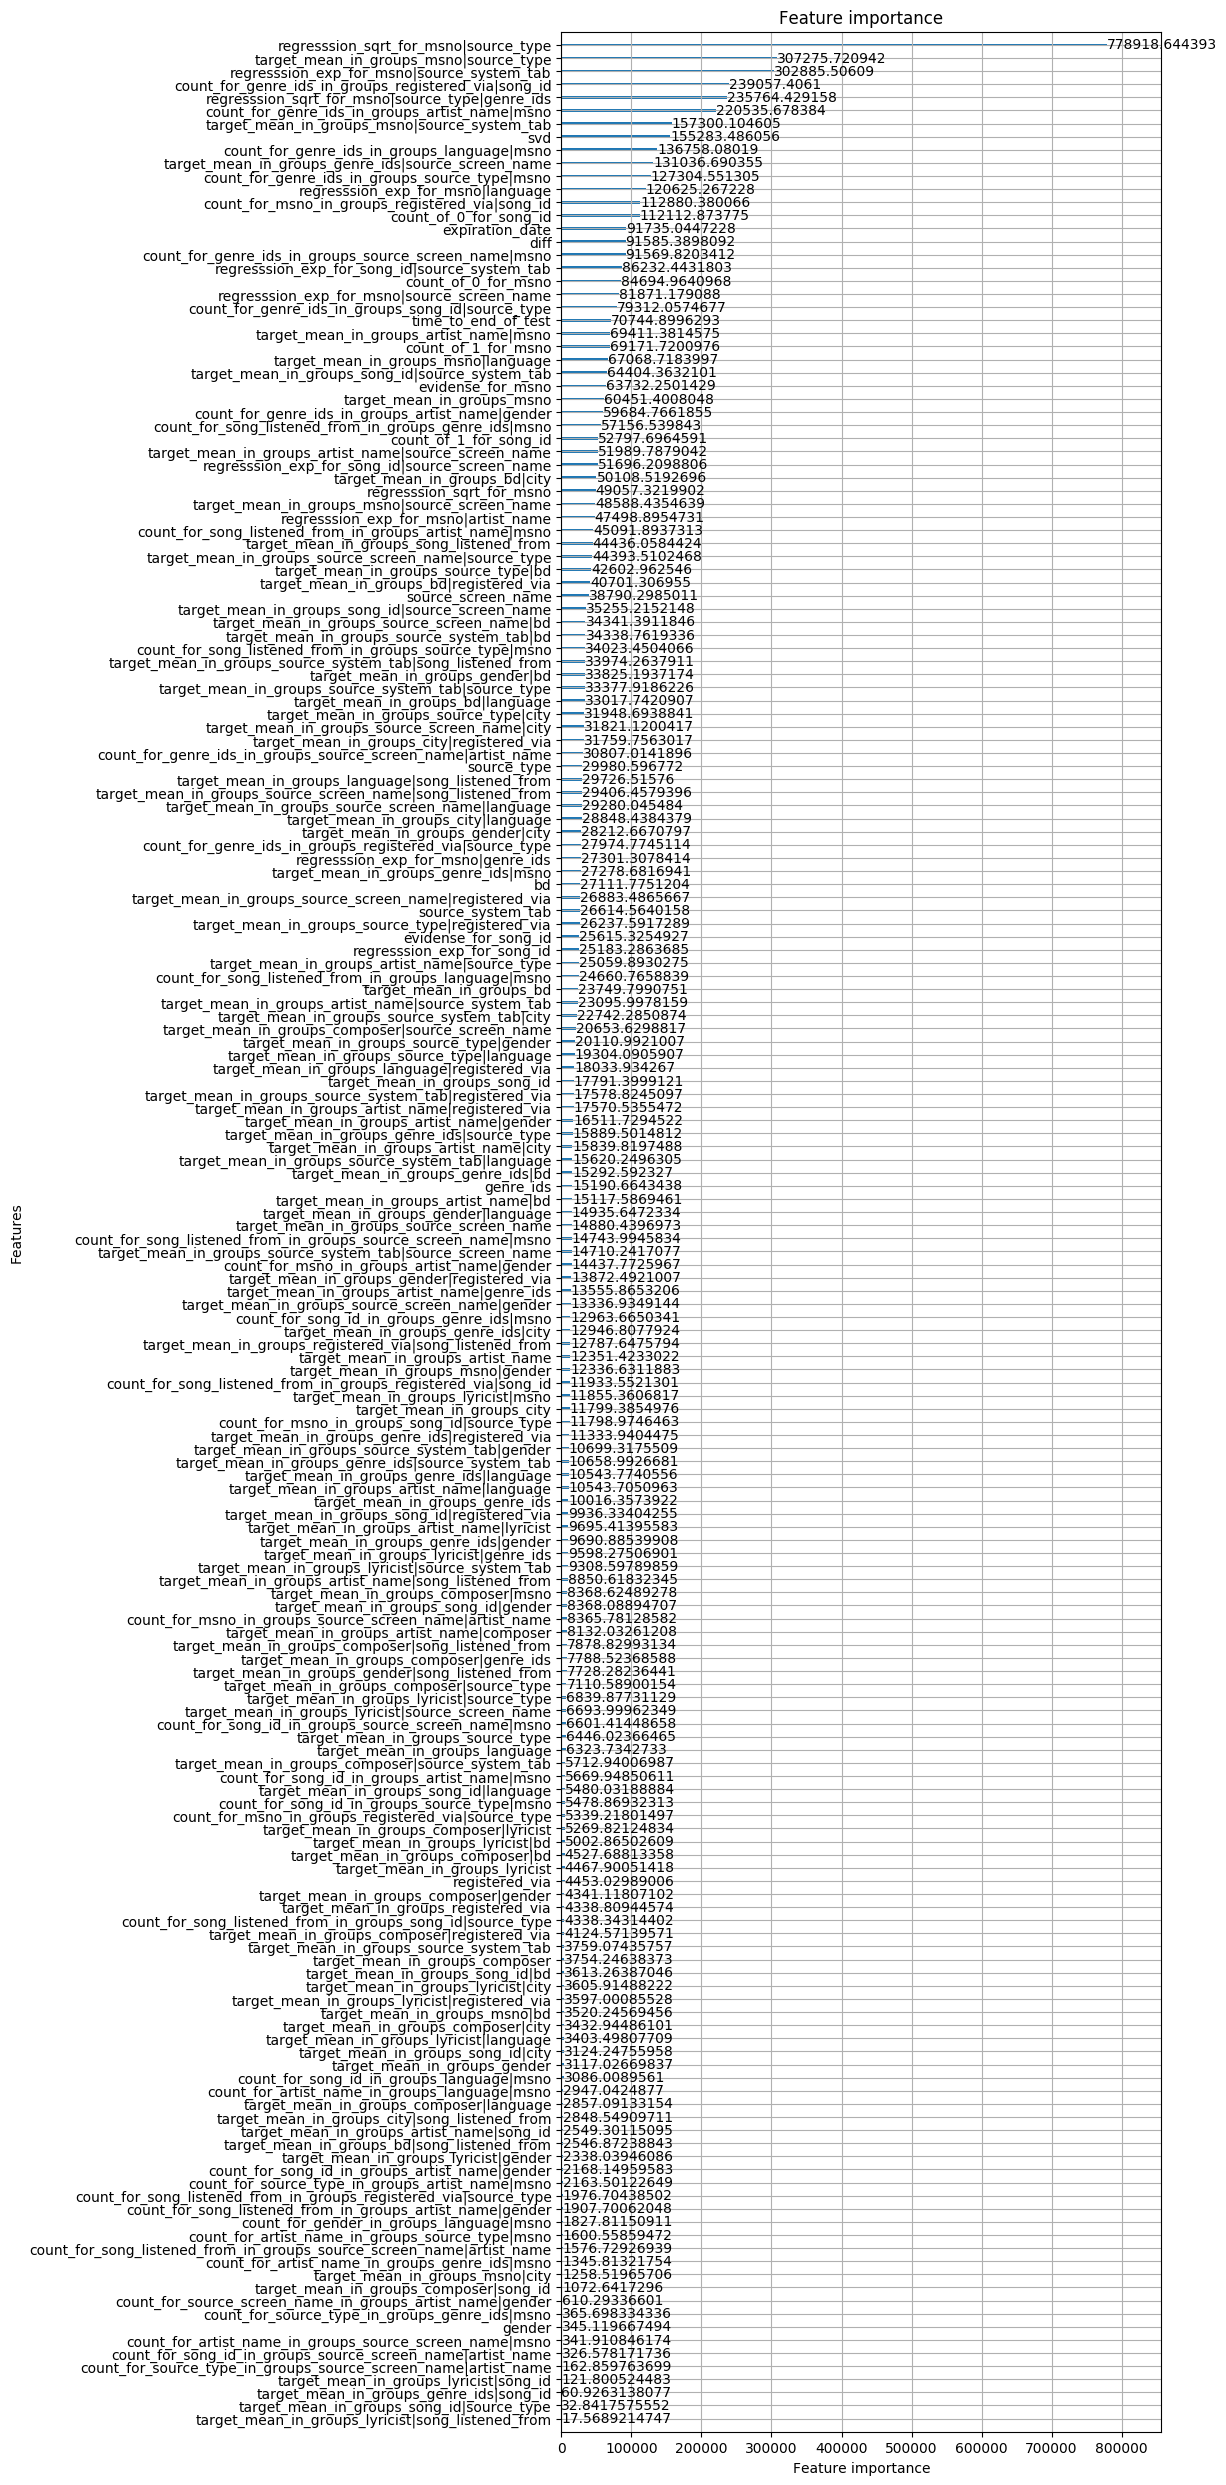

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 30), dpi=100)
ax = fig.add_axes([0.1, 0.4, 0.6, 0.8])
lgb.plot_importance(gbm, ax, importance_type='gain', max_num_features=-1)
plt.savefig('./logs/FE.png');

Plot metrics during training...


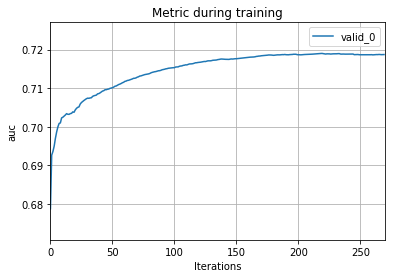

In [58]:
print('Plot metrics during training...')
fig = plt.figure(figsize=(25, 20))
ax = lgb.plot_metric(evals_result, metric='auc')
plt.savefig('./logs/tmp_auc_val.png');

#### submission

In [52]:
import lightgbm as lgb

In [53]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth':10,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'num_leaves': 512,
    'learning_rate': 0.03,
    'feature_fraction_seed':4242,
    'bagging_seed':4242,
    'data_random_seed':4242,
}

In [54]:
y_train = loc_train.target.values
test_ids = loc_test['id'].values.astype(int)

In [55]:
del loc_train, loc_test
gc.collect()

14

In [56]:
lgb_train = lgb.Dataset(X_tr.values, y_train, feature_name=list(X_tr.columns.values))
print('Start training...')
gbm = lgb.train(params, lgb_train, num_boost_round=220)
print('End training.')

Start training...
End training.


In [57]:
gbm.save_model('model6.lgbm')

In [58]:
print('Making predictions and saving them...')
preds = gbm.predict(X_ts)
subm = pd.DataFrame()
subm['id'] = test_ids
subm['target'] = preds
subm.to_csv('submission.csv.gz', compression = 'gzip', 
            index=False, float_format = '%.5f')
print('Done!')
subm.head()

Making predictions and saving them...
Done!


,id,target
0,0,0.280451
1,1,0.373447
2,2,0.116886
3,3,0.113179
4,4,0.074788


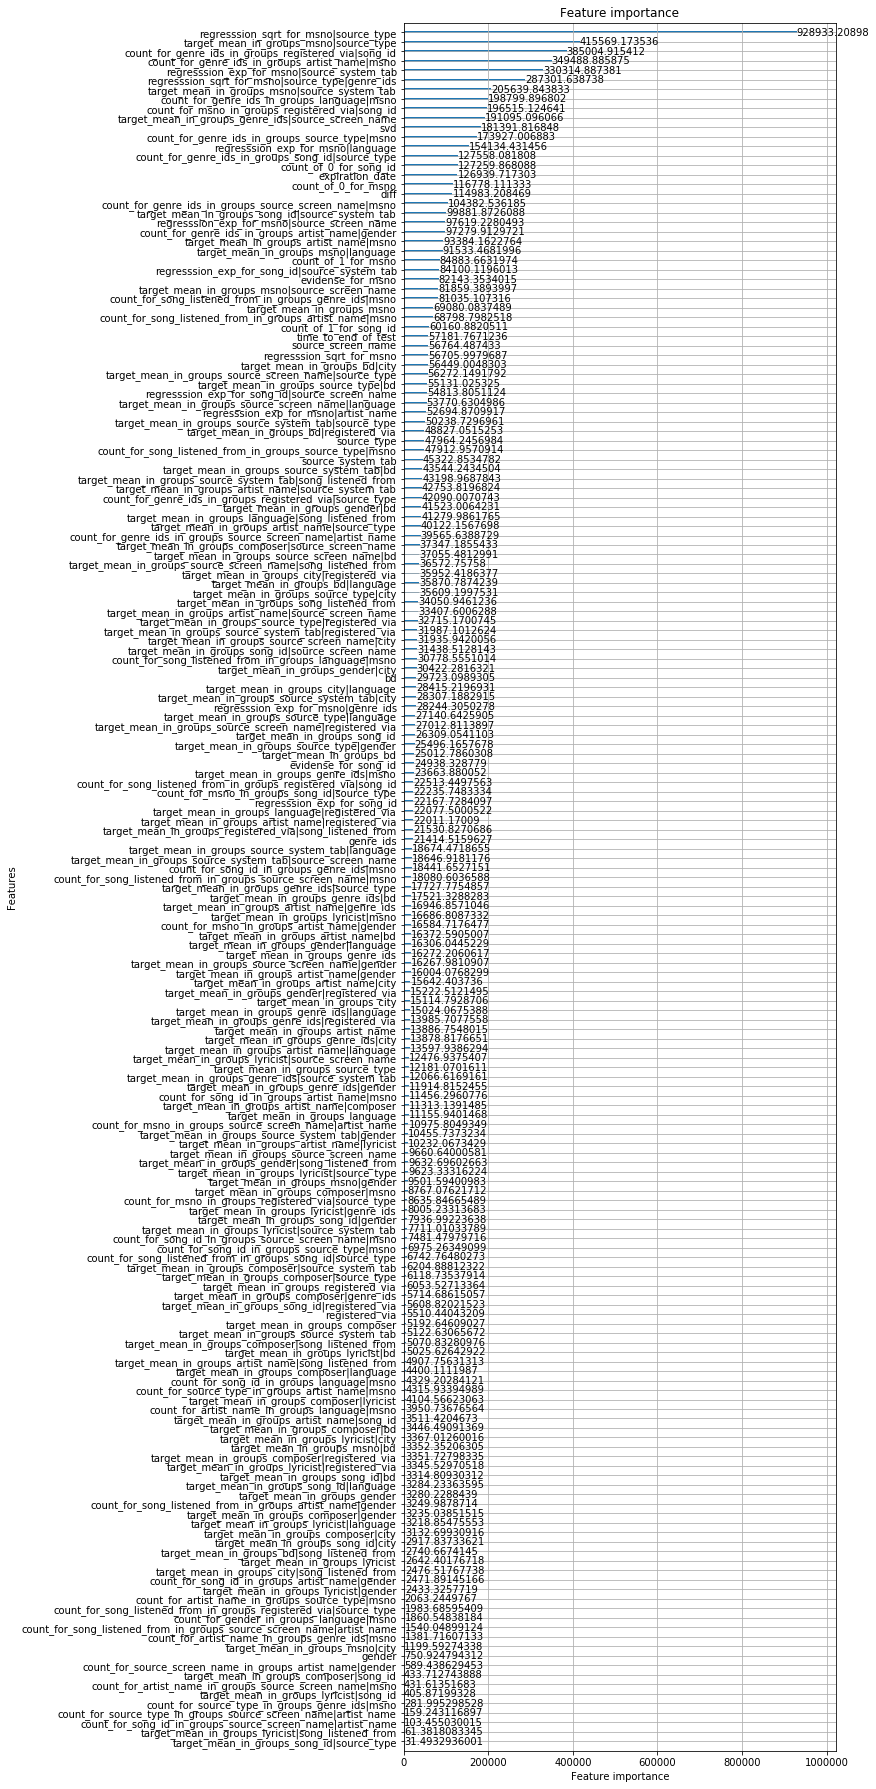

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 30))
ax = fig.add_axes([0.1, 0.4, 0.6, 0.8])
lgb.plot_importance(gbm, ax, importance_type='gain', max_num_features=-1)

сабмит на 0.71